In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df1 = pd.read_csv("diabetic_nine.csv")

In [3]:
df1

,Unnamed: 0,gender,age,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,readmitted_2
0,0,Female,0,None,None,No,No,No,NO,No
1,1,Female,10,None,None,Up,Ch,Yes,>30,Yes
2,2,Female,20,None,None,No,No,Yes,NO,No
3,3,Male,30,None,None,Up,Ch,Yes,NO,No
4,4,Male,40,None,None,Steady,Ch,Yes,NO,No
...,...,...,...,...,...,...,...,...,...,...
101758,101761,Male,70,None,>8,Down,Ch,Yes,>30,Yes
101759,101762,Female,80,None,None,Steady,No,Yes,NO,No
101760,101763,Male,70,None,None,Down,Ch,Yes,NO,No
101761,101764,Female,80,None,None,Up,Ch,Yes,NO,No


In [4]:
#checking shape of the dataset
df1.shape

(101763, 10)

In [5]:
#Checking data types of each variable
df1.dtypes

Unnamed: 0        int64
gender           object
age               int64
max_glu_serum    object
A1Cresult        object
insulin          object
change           object
diabetesMed      object
readmitted       object
readmitted_2     object
dtype: object

In [6]:
#Checking for missing values in dataset
#In the dataset missing values are represented as '?' sign
for col in df1.columns:
    if df1[col].dtype == object:
         print(col,df1[col][df1[col] == '?'].count())

gender 0
max_glu_serum 0
A1Cresult 0
insulin 0
change 0
diabetesMed 0
readmitted 0
readmitted_2 0


In [7]:
# gender was coded differently so we use a custom count for this one            
print('gender', df1['gender'][df1['gender'] == 'Unknown/Invalid'].count())            

gender 0


In [8]:
df1['change'] = df1['change'].replace('Ch', 1)
df1['change'] = df1['change'].replace('No', 0)

df1['gender'] = df1['gender'].replace('Female', 0)
df1['diabetesMed'] = df1['diabetesMed'].replace('Yes', 1)
df1['diabetesMed'] = df1['diabetesMed'].replace('No', 0)


In [9]:
df1['A1Cresult'] = df1['A1Cresult'].replace('>7', 1)
df1['A1Cresult'] = df1['A1Cresult'].replace('>8', 1)
df1['A1Cresult'] = df1['A1Cresult'].replace('Norm', 0)
df1['A1Cresult'] = df1['A1Cresult'].replace('None', -99)
df1['max_glu_serum'] = df1['max_glu_serum'].replace('>200', 1)
df1['max_glu_serum'] = df1['max_glu_serum'].replace('>300', 1)
df1['max_glu_serum'] = df1['max_glu_serum'].replace('Norm', 0)
df1['max_glu_serum'] = df1['max_glu_serum'].replace('None', -99)

In [10]:
# code age intervals [0-10) - [90-100) from 1-10
for i in range(0,10):
    df1['age'] = df1['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df1['age'].value_counts()

70    26066
60    22482
50    17256
80    17197
40     9685
30     3775
90     2793
20     1657
10      691
0       161
Name: age, dtype: int64

In [11]:
df1['readmitted'] = df1['readmitted'].replace('>30', 0)
df1['readmitted'] = df1['readmitted'].replace('<30', 1)
df1['readmitted'] = df1['readmitted'].replace('NO', 0)

In [12]:
df1

,Unnamed: 0,gender,age,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,readmitted_2
0,0,0,0,-99,-99,No,0,0,0,No
1,1,0,10,-99,-99,Up,1,1,0,Yes
2,2,0,20,-99,-99,No,0,1,0,No
3,3,Male,30,-99,-99,Up,1,1,0,No
4,4,Male,40,-99,-99,Steady,1,1,0,No
...,...,...,...,...,...,...,...,...,...,...
101758,101761,Male,70,-99,1,Down,1,1,0,Yes
101759,101762,0,80,-99,-99,Steady,0,1,0,No
101760,101763,Male,70,-99,-99,Down,1,1,0,No
101761,101764,0,80,-99,-99,Up,1,1,0,No


In [13]:
#dropping columns with large number of missing values
df1 = df1.drop(['readmitted_2'], axis = 1)

In [14]:
df1

,Unnamed: 0,gender,age,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted
0,0,0,0,-99,-99,No,0,0,0
1,1,0,10,-99,-99,Up,1,1,0
2,2,0,20,-99,-99,No,0,1,0
3,3,Male,30,-99,-99,Up,1,1,0
4,4,Male,40,-99,-99,Steady,1,1,0
...,...,...,...,...,...,...,...,...,...
101758,101761,Male,70,-99,1,Down,1,1,0
101759,101762,0,80,-99,-99,Steady,0,1,0
101760,101763,Male,70,-99,-99,Down,1,1,0
101761,101764,0,80,-99,-99,Up,1,1,0


In [15]:
df1['insulin'].value_counts()

No        47380
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64

In [16]:
df1 = df1.drop(set(df1['gender'][df1['gender'] == 'Male'].index))

In [18]:
# save dataset to new file for machine learning
df1.to_csv('diabetic_Female.csv')

In [19]:
df1['insulin'] = df1['insulin'].replace('No', 0)
df1['insulin'] = df1['insulin'].replace('Steady', 1)
df1['insulin'] = df1['insulin'].replace('Up', 1)
df1['insulin'] = df1['insulin'].replace('Down', 1)

In [20]:
df1

,Unnamed: 0,gender,age,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted
0,0,0,0,-99,-99,0,0,0,0
1,1,0,10,-99,-99,1,1,1,0
2,2,0,20,-99,-99,0,0,1,0
8,8,0,80,-99,-99,1,1,1,0
9,9,0,90,-99,-99,1,1,1,0
...,...,...,...,...,...,...,...,...,...
101754,101757,0,70,-99,-99,1,0,1,0
101755,101758,0,80,-99,-99,1,1,1,0
101757,101760,0,60,-99,-99,1,1,1,0
101759,101762,0,80,-99,-99,1,0,1,0


In [21]:
df1['readmitted'].value_counts()

0    48556
1     6152
Name: readmitted, dtype: int64

In [22]:
#Loading libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

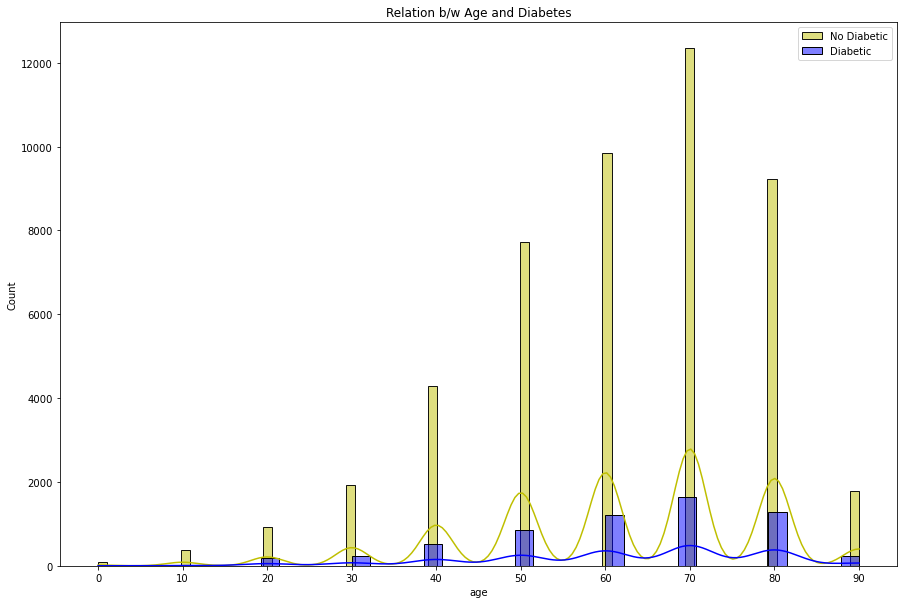

In [23]:
plt.figure(figsize=(15, 10))
sns.histplot(df1.age[df1.readmitted == 0], color="y", label="No Diabetic" , kde = True )
sns.histplot(df1.age[df1.readmitted == 1], color="b", label="Diabetic" , kde = True )
plt.title("Relation b/w Age and Diabetes")

plt.xticks(df1["age"].unique())
plt.legend()

In [24]:
df1.columns

Index(['Unnamed: 0', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'insulin',
       'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [25]:
feature_set = ['gender', 'age', 'max_glu_serum', 'A1Cresult', 'insulin', 'change',
       'diabetesMed', 'readmitted']

In [26]:
X = df1[feature_set]
y = df1['readmitted']

In [27]:
df1['readmitted'].value_counts()

0    48556
1     6152
Name: readmitted, dtype: int64

In [28]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [29]:
f1 = df1.iloc[:,:7].values
t1 = df1.iloc[:,7].values

df2 = df1.copy(deep = True)
df2.head()

,Unnamed: 0,gender,age,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted
0,0,0,0,-99,-99,0,0,0,0
1,1,0,10,-99,-99,1,1,1,0
2,2,0,20,-99,-99,0,0,1,0
8,8,0,80,-99,-99,1,1,1,0
9,9,0,90,-99,-99,1,1,1,0


In [30]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE

In [31]:
over = SMOTE()
f2 = df1.iloc[:,:7].values
t2 = df1.iloc[:,7].values
f2, t2 = over.fit_resample(f2, t2)
Counter(t2)

Counter({0: 41787, 1: 41787})

## Modeling

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [33]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(f1, t1, test_size = 0.25, random_state = 2) # Unbalanced
x_train2, x_test2, y_train2, y_test2 = train_test_split(f2, t2, test_size = 0.25, random_state = 2) # Balanced

Selecting the features from the above conducted tests and splitting the data into 75 - 25 train - test groups.

In [34]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

In [35]:
## Xgboost Classifier :
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score :  91.45%
ROC_AUC Score :  90.65%


C:\Users\Ashvini Alashetty\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


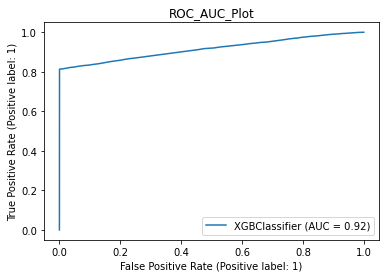

              precision    recall  f1-score   support

           0       0.62      1.00      0.77      3240
           1       1.00      0.81      0.90     10437

    accuracy                           0.86     13677
   macro avg       0.81      0.91      0.83     13677
weighted avg       0.91      0.86      0.87     13677



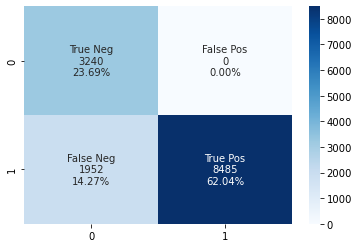

In [36]:
#### Unbalanced Dataset :
model(classifier_xgb,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_xgb,x_test1,y_test1)

Cross Validation Score :  96.01%
ROC_AUC Score :  90.16%


C:\Users\Ashvini Alashetty\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


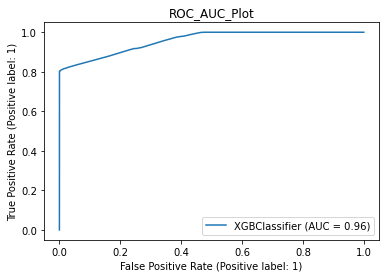

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     10451
           1       1.00      0.80      0.89     10443

    accuracy                           0.90     20894
   macro avg       0.92      0.90      0.90     20894
weighted avg       0.92      0.90      0.90     20894



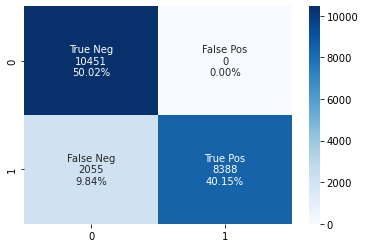

In [37]:
#### Balanced Dataset :
model(classifier_xgb,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_xgb,x_test2,y_test2)

In [38]:
## LightGBM Classifier :
from lightgbm import LGBMClassifier

classifier_lgbm = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score :  91.48%
ROC_AUC Score :  90.60%


C:\Users\Ashvini Alashetty\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


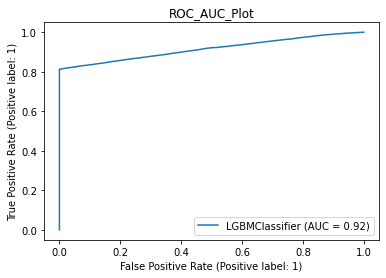

              precision    recall  f1-score   support

           0       0.62      1.00      0.77      3240
           1       1.00      0.81      0.90     10437

    accuracy                           0.86     13677
   macro avg       0.81      0.91      0.83     13677
weighted avg       0.91      0.86      0.87     13677



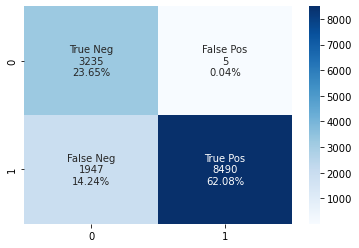

In [39]:
#### Unbalanced Dataset :
model(classifier_lgbm,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_lgbm,x_test1,y_test1)

Cross Validation Score :  96.00%
ROC_AUC Score :  90.16%


C:\Users\Ashvini Alashetty\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


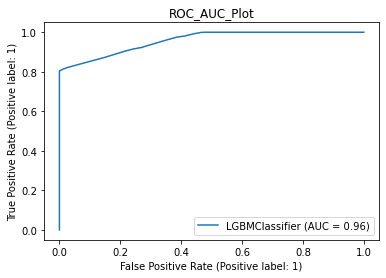

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     10451
           1       1.00      0.80      0.89     10443

    accuracy                           0.90     20894
   macro avg       0.92      0.90      0.90     20894
weighted avg       0.92      0.90      0.90     20894



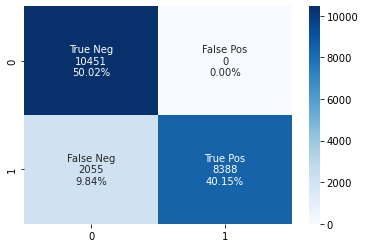

In [40]:
#### Balanced Dataset :
model(classifier_lgbm,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_lgbm,x_test2,y_test2)

In [41]:
### Stack of XGBClassifier and LightGBMClassifier :
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(estimators = [('classifier_xgb',classifier_xgb),
                                         ('classifier_lgbm',classifier_lgbm)],
                           final_estimator = classifier_lgbm)

##### For stacking of classifiers, we stack the above 2 classifiers :
+ XGBClassifier
+ LightGBMClassifier
It has an important hyperparameter known as final_estimator. It is the final classifier that makes the final prediction by using the predicted classes by the various classifier and predicts the final output.

In [ ]:
#### Unbalanced Dataset :
model(stack,x_train1,y_train1,x_test1,y_test1)
model_evaluation(stack,x_test1,y_test1)

In [ ]:
#### Balanced Dataset :
model(stack,x_train2,y_train2,x_test2,y_test2)
model_evaluation(stack,x_test2,y_test2)